In [1]:
############################################
#
#  Beispiele und Anleitung für die Nutzung der Bibliothek xraylib
#  Mit dieser Bibliothek können röntgenphysikalische Rechnungen durchgeführt werden
#  Dieses Skript enthält die Referenz zur xraylib, d.h. wo man sie findet und wie man sie installiert,
#  sowie einige Beispiele. 
#  
#  Zur Nutzung werden schon Kenntnisse in python und der Nutzung des Jupyter Notebooks vorausgesetzt.
#  
#  Version 1: Wolfgang Malzer, wolfgang.malzer@tu-berlin.de, www.axp.tu-berlin.de, Nov. 2022

In [2]:
# die Bibliothek xraylib enthält funktionen für
# die Berechnung von Absorption, Linienenergien, etc.
# Die Dokumentation zur xraylib findet ihr unter:
# https://github.com/tschoonj/xraylib/wiki
# inklusive der API - Application Programmers Interface, 
# d.h. alle Funktionsaufrufe und wie man sie benutzt
# und der Installationsanleitung
# Installation unter Anaconda: conda install -c conda-forge xraylib=4.1.0
import xraylib as xrl

In [3]:
# dann erst mal die bibliotheken, die wir immer nutzen
import numpy as np
import matplotlib.pyplot as plt

# Verwendung von Kommata als Dezimaltrenner in den Abbildungen
import locale
locale.setlocale(locale.LC_NUMERIC, "de_DE")
plt.rcParams["axes.formatter.use_locale"] = True

# ggf. Verwendung von LaTeX zum Erstellen der Abbildungen
plt.rcParams["text.usetex"] =  False

In [4]:
# Ein Beispiel, Atomare Masse von Eisen
Z = xrl.SymbolToAtomicNumber("Fe")
AtomWeight = xrl.AtomicWeight(Z)
print("Die atomare Masse von Fe ist " +  str(AtomWeight))

Die atomare Masse von Fe ist 55.85


In [5]:
# Beispiel Comptonverschiebung
# Streuwinkel Theta, Umrechnung von grad in rad
Theta = 45 * np.pi/180
# Die Energie sei 6 keV
ComptEnergie = xrl.ComptonEnergy(6.0, Theta)
print("Die Energie eines Photons mit einer Energie von 6 keV, das unter 45° gestreut wird ist:" + str(ComptEnergie))

Die Energie eines Photons mit einer Energie von 6 keV, das unter 45° gestreut wird ist:5.979436320649443


In [6]:
# Beispiel Absorption
# Wie groß ist die Schwächung von Strahlung mit 6 keV durch 100 µm Kohlenstoff mit Dichte 1 g/cm3?
E = 6 # Die Photonenergie
Z = xrl.SymbolToAtomicNumber("C") # die Ordnungszahl des Absorbers
d = 0.01 # Die Dicke des Absorbers, muss in cm angegeben werden, da Wirkungsquerschnitte in cm^2/g ausgegeben werden
rho = 1.0 # Die Dichte in g/cm3
# Benutzt wird das Lambert-Beer Gesetz: I/I0 = epx(-µ * rho * d)
mue = xrl.CS_Total(Z, E) # Wechselwirkungsquerschnitt in cm^2/g
transmission = np.exp(-mue * rho * d)
print("Die Schwächung ist: {:.1%}".format(1 - transmission))

Die Schwächung ist: 10.4%


In [7]:
# und jetzt die Transmission durch Wasser
AtomWeight_O = xrl.AtomicWeight(8)
AtomWeight_H = xrl.AtomicWeight(1)
Anteil_O = AtomWeight_O/(AtomWeight_O + 2 * AtomWeight_H)
mue = Anteil_O * xrl.CS_Total(8, E) + (1-Anteil_O) * xrl.CS_Total(1, E)
rho = 1.0 # 1 g/cm^3.
d = 0.01
transmission = np.exp(-mue * rho * d)
print("Die Schwächung ist: {:.3f}".format(1 - transmission))

Die Schwächung ist: 0.218


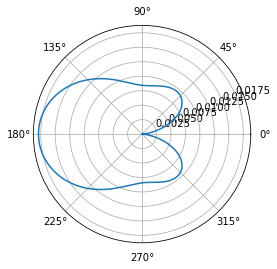

In [8]:
# plot the differential cross section (proportional to scatter intensity) for compton scattering
ScatAngle = np.linspace(0.01, 2 * np.pi-0.01, 400) # die xraylib ist etwas zickig, Winkel von 0°, bzw 180° produzieren
E = 8.0 # Energie einfallende Strahlung              unverständliche Fehlermeldungen
Z = 6 # Kohlenstoff als Streuer
# leider stellt die xraylib keine ufuncs zur Verfügung, man muss komponentenweise rechnen
DiffComptonCS = np.zeros(len(ScatAngle)) 
for i in range(len(ScatAngle)):
    DiffComptonCS[i] = xrl.DCS_Compt(Z, E, ScatAngle[i])
plt.polar(ScatAngle, DiffComptonCS)